<a href="https://colab.research.google.com/github/DAwithVG/data_projects/blob/main/Python_data_analyst_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import seaborn as sb
import numpy as np
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#reading the data

dr = pd.read_csv(r'/content/drive/MyDrive/Data_Analyst_Python_Project/movies.csv')

dr.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
#to find the missing values in columns
for col in dr.columns:
  pct_missing = np.mean(dr[col].isnull())
  print(f'{col} - {pct_missing}')

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [11]:
#deleted rows with null values
dr1 = dr.dropna(axis = 0,how = 'any')

In [12]:
# percentage of missing values in columns has been reduced to zero

for col in dr1.columns:
  pct_missing = np.mean(dr1[col].isnull())
  print(f'{col} - {pct_missing}')

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [14]:
# to find data types of each column
dr1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
#our data contains nan values so we have to remove those
dr2 = dr1.dropna(how = 'all')

In [19]:
#convert datatype of column gross and budget into int
dr2['budget'] = dr2['budget'].astype('int64')
dr2['gross'] = dr2['gross'].astype('int64')

In [21]:
dr2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [22]:
dr2

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [39]:
dr2['correct_year'] =pd.to_datetime(dr2['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')

In [48]:
#Since the year released and the year in released date is different we are gonna create a new column known as correct year and extract the year from released date colum and place it in our new column

dr2['correct_year'] = dr2['released'].astype(str).str.split().str[2]
dr2



name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime correct_year  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [56]:
# to sort our data by the gross colum
dr2 = dr2.sort_values(by=["gross"], inplace = False,ascending = False)

In [53]:
#to view all data
pd.set_option('display.max_rows', None)
dr2.sort_values(by=["gross"], inplace = False,ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [ ]:
# to drop duplicates
dr2 = dr2.drop_duplicates()

Text(0, 0.5, 'Gross')

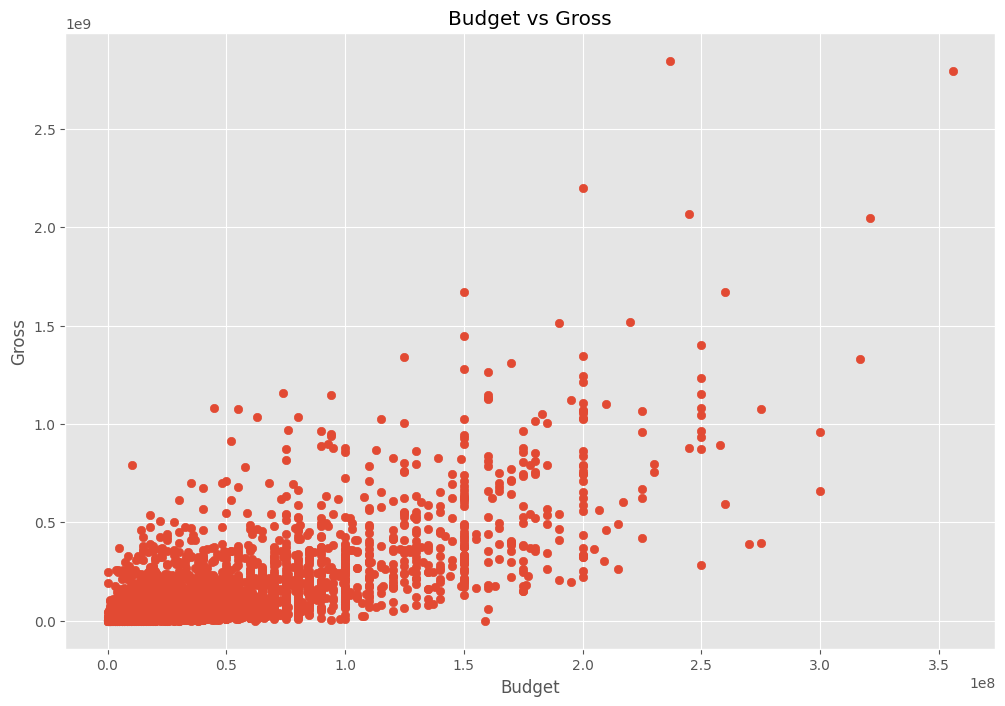

In [60]:
# scatter plot chart for budget vs gross revenue

plt.scatter(x=dr2['budget'], y =dr2['gross'])

plt.title('Budget vs Gross')

plt.xlabel('Budget')
plt.ylabel('Gross')

<Axes: xlabel='budget', ylabel='gross'>

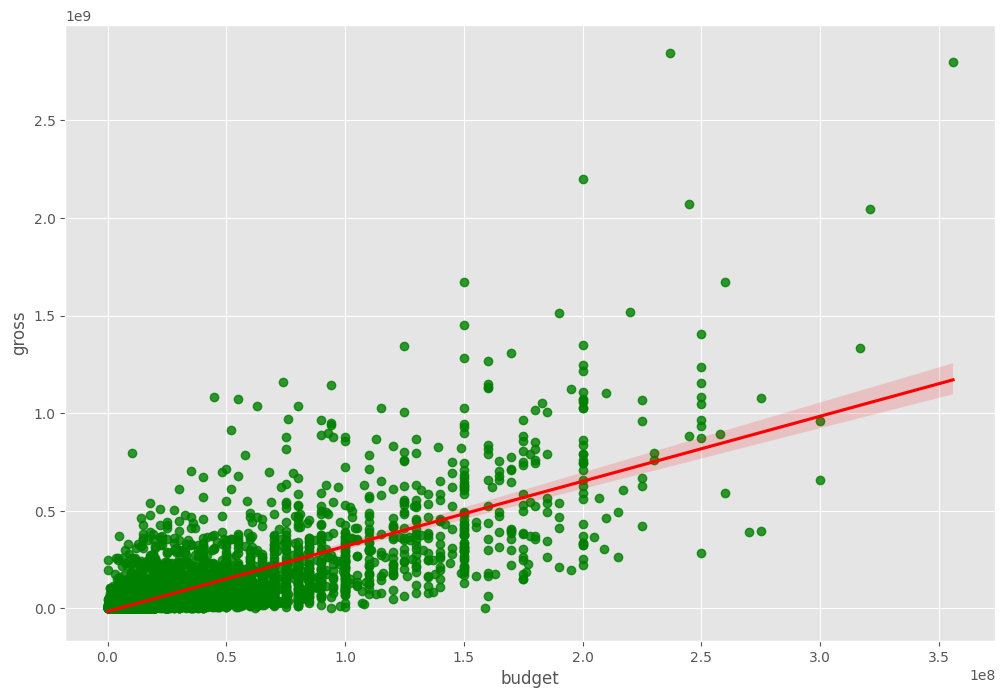

In [63]:
#to plot regplot using seaborn for Budget vs gross
sb.regplot(x='budget',y='gross', data = dr2, scatter_kws={"color": "green"},line_kws={"color":"red"})

In [70]:
#correlation on numerical columns with earch other
correlation_matrix = dr2.corr(method = "pearson",numeric_only = True)

correlation_matrix

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

Text(0.5, 58.7222222222222, 'Movie Features')

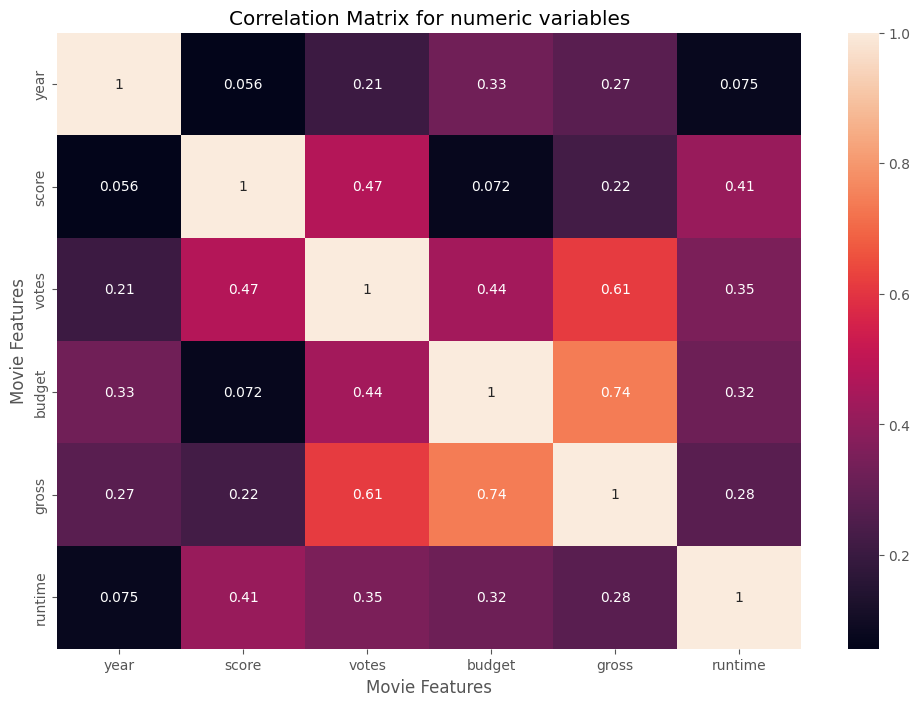

In [73]:
sb.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric variables')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

In [77]:
#Converted the string columns into category data type and assigned them a number so that we can compare all the factors and their correlation with each other
df_numerised = dr2
for col in df_numerised.columns:
  if(df_numerised[col].dtype== 'object'):
    df_numerised[col] = df_numerised[col].astype('category')
    df_numerised[col] = df_numerised[col].cat.codes


df_numerised = df_numerised.sort_values(by=["gross"], inplace = False,ascending = False)
df_numerised.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating       -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre         0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year          0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released     -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score         0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes         0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director      0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer        0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star         -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country      -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget        0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross         0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company       0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime       0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
correct_year  0.026784  0.019749 -0.067962  0.994821 -0.008821  0.061059   

                 votes  director    writer      star   country    budget  \
name          0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating        0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre        -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year          0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released      0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score         0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes         1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director     -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer       -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star         -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country       0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget        0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross         0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company       0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime       0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
correct_year  0.202953 -0.035162 -0.022050 -0.031631 -0.071611  0.320216   

                 gross   company   runtime  correct_year  
name          0.005639  0.021697  0.010850      0.026784  
rating       -0.181906 -0.092357  0.140792      0.019749  
genre        -0.244101 -0.071334 -0.059237     -0.067962  
year          0.274321 -0.014333  0.075077      0.994821  
released      0.008501 -0.002407  0.008975     -0.008821  
score         0.222556  0.020656  0.414068      0.061059  
votes         0.614751  0.118470  0.352303      0.202953  
director     -0.029560 -0.008223  0.017433     -0.035162  
writer       -0.035885 -0.003697 -0.017561     -0.022050  
star         -0.000004  0.014082  0.010108     -0.031631  
country       0.060078  0.048569 -0.034477     -0.071611  
budget        0.740247  0.170235  0.318695      0.320216  
gross         1.000000  0.149553  0.275796      0.268367  
company       0.149553  1.000000  0.037585     -0.016150  
runtime       0.275796  0.037585  1.000000      0.076203  
correct_year  0.268367 -0.016150  0.076203      1.000000

Text(120.72222222222221, 0.5, 'Movie Features')

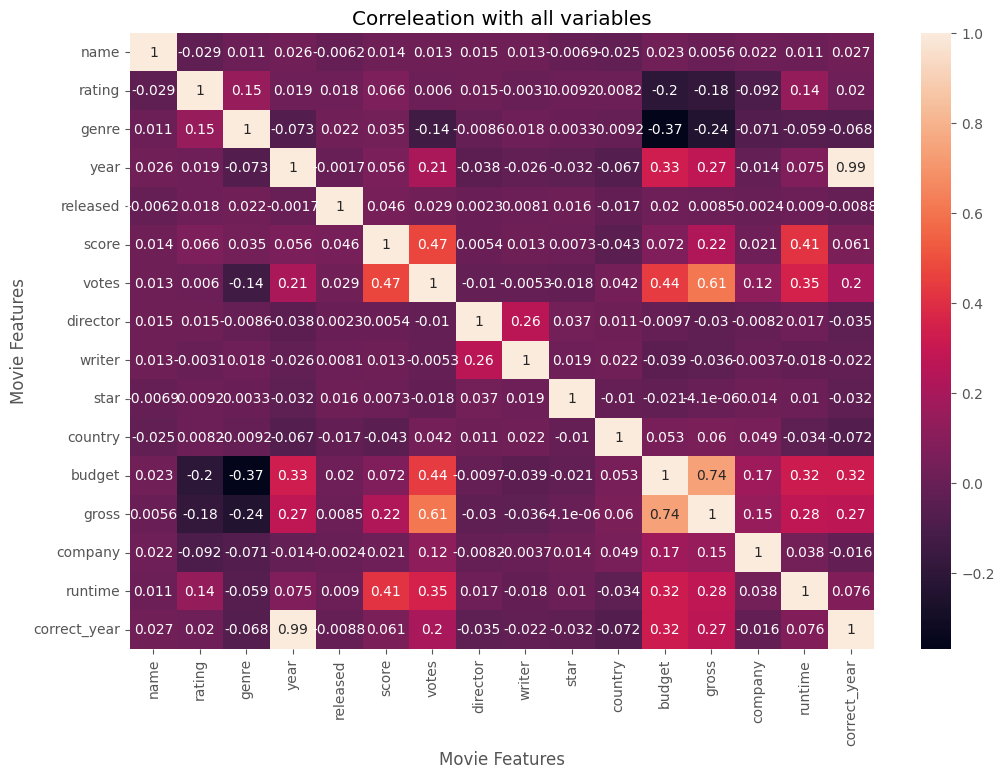

In [79]:
all_fac_corr= df_numerised.corr()
sb.heatmap(all_fac_corr,annot = True)

plt.title('Correleation with all variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [81]:
corr_pairs = all_fac_corr.unstack()
corr_pairs


name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              correct_year    0.026784
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [86]:
high_corr = corr_pairs[(corr_pairs)>0.5]
high_corr

name          name            1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
              correct_year    0.994821
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
              gross           0.614751
director      director        1.000000
writer        writer          1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
              gross           0.740247
gross         votes           0.614751
              budget          0.740247
              gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
correct_year  year            0.994821
              correct_year    1.000000
dtype: float64

***Summary***

* At the end of this project we can infer that the budget and gross earnings of a movie have high positive correlation(i.e. the more the budget the more the earnings wil be and vice versa)

* Votes also have a high correlation with the gross earnings of the movie.

* Production company and movie runtime have less to no correlation with the revenue generated by the movie.


